# Dimensionality Reduction: the Notebook

The docs for many methods are available here:

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

Some particular sub-links:

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA 


In this notebook, I have a few tasks for you to try out related to PCA :)

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA

#from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 

from sklearn.datasets import make_swiss_roll
from sklearn.datasets import make_s_curve
from sklearn.datasets import make_circles

(1000, 2)
Explained variance ratio: 
 [0.88985194 0.11014806]
Cumulative explained variance: 
 [0.88985194 1.        ]
PCA components: 
 [[ 0.70784011  0.70637269]
 [-0.70637269  0.70784011]]


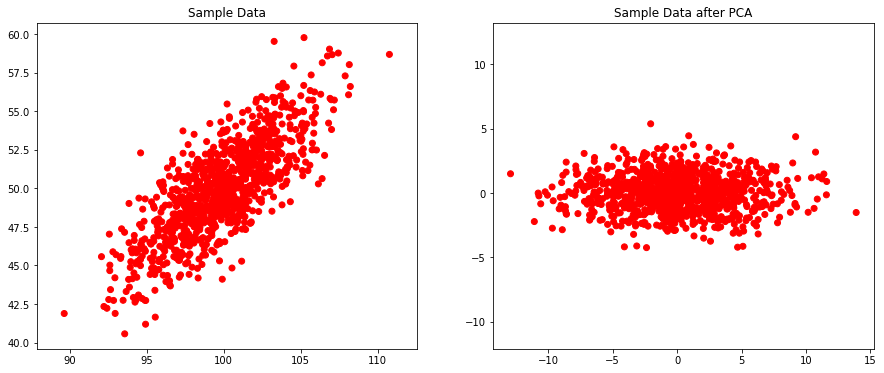

In [2]:
# small sample data set and PCA process
np.random.seed(42)

covar = 8
dat_low = np.random.multivariate_normal([100, 50], [[10, covar], [covar, 10]], 1000)

print(dat_low.shape)

plt.figure(figsize=(15, 6))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
p = plt.subplot(1, 2, 1)
p.scatter(dat_low[:, 0], dat_low[:, 1], c=[1 for i in range(dat_low.shape[0])], cmap=cm_bright)
p.axis('equal')
p.set_title("Sample Data")

n_comp = 2
pca_mod = PCA(n_components = n_comp)
pca_mod.fit(dat_low)
new_pca_features = pca_mod.transform(dat_low)


print('Explained variance ratio: \n', pca_mod.explained_variance_ratio_ )
print('Cumulative explained variance: \n', np.cumsum(pca_mod.explained_variance_ratio_))
print('PCA components: \n', pca_mod.components_ )


p = plt.subplot(1, 2, 2)
p.scatter(new_pca_features[:, 0], new_pca_features[:, 1], 
          c=[1 for i in range(new_pca_features.shape[0])], cmap=cm_bright)
p.axis('equal')
p.set_title("Sample Data after PCA")
plt.show()

## Task 1: PCA -- visualizing PCA and choosing the number of components

Some code is provided to generate correlated data in an arbitrary number of dimensions.

NOTE: Do not set the dimensions for make_correlated_data to anything less than 3

1. Use the independent data first. Plot the amount of explained variance vs the number of components. How can you use this chart to choose the number of componenets? Examine the function make_independent_data, look particularly at the covariance used to generate the data. Does this explain the PCA results?

2. Examine the principle components themselves. How can you tell which original dimensions are being used in the componenets? What changes as you switch between independent data and correlated data? What happens as you increase phi from a low value (e.g. 0.1) to a high value (e.g 0.9) when you generate correlated data?

3. Try the first question again with the correlated data.

In [3]:
#np.random.seed(42)

def make_independent_data(dimension=3, n=1000, version=1):
    '''
    Makes independent data in "dimension" dimensions
    '''
    if version == 1:
        covar = np.diag([10 / float( (i + 1) ** 2) for i in range(dimension)])
    else:
        covar = np.diag([10 for i in range(dimension)])
    print("Covariance matrix:\n", covar)
    dat_i = np.random.multivariate_normal([0 for i in range(dimension)], covar, n)
    
    return dat_i


def make_correlated_data(dimension, phi=0.5, n=1000):
    '''
    Makes dependent data in "dimension" dimensions, correlation between
    index-adjacent dimensions controlled with "phi"
    NOTE: Phi must be between 0 and 1
    '''
    
    covar = np.zeros((dimension, dimension))
    covar_vec = np.linspace(1,0,dimension)
    for ii in range(dimension):
        for jj in range(dimension):
            covar[ii, jj] = np.power(phi, np.abs(ii - jj))
            #covar[ii, jj] = covar_vec[np.abs(ii-jj)]
    
        dat = np.random.multivariate_normal([0 for i in range(dimension)], covar, n)
        
    return dat


In [23]:
# generate some data
n_comp = 5
dat_independent = make_independent_data(n_comp)

# perform PCA
pca_mod = PCA(n_components = n_comp)
pca_mod.fit(dat_independent)

evr = pca_mod.explained_variance_ratio_
s_evr = np.cumsum(np.concatenate(([0], evr)))

print('PCA components:\n', pca_mod.components_)
print()
print('Explained variance ratio: \n', evr)
print('Cumulative explained variance: \n', s_evr)



Covariance matrix:
 [[10.          0.          0.          0.          0.        ]
 [ 0.          2.5         0.          0.          0.        ]
 [ 0.          0.          1.11111111  0.          0.        ]
 [ 0.          0.          0.          0.625       0.        ]
 [ 0.          0.          0.          0.          0.4       ]]
PCA components:
 [[ 0.99984405 -0.01706521 -0.00212998 -0.00332953 -0.00224405]
 [ 0.0168771   0.99882391 -0.03995818 -0.01549306 -0.01514158]
 [ 0.00277734  0.03970211  0.99903901  0.00356397 -0.01801049]
 [ 0.00344957  0.01447221 -0.00504812  0.99862701 -0.04997266]
 [-0.00272582 -0.01654905 -0.01715734 -0.04980233 -0.99847086]]

Explained variance ratio: 
 [0.68592037 0.17077661 0.07751533 0.04076832 0.02501937]
Cumulative explained variance: 
 [0.         0.68592037 0.85669698 0.93421231 0.97498063 1.        ]


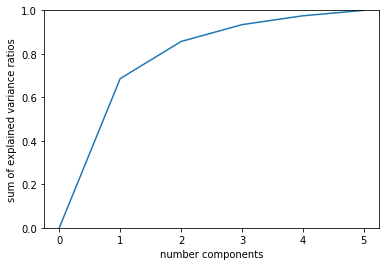

In [24]:
plt.plot(range(n_comp+1),s_evr)
plt.xlabel('number components')
plt.ylabel('sum of explained variance ratios')
plt.ylim([0,1])
plt.show()

In [25]:
n_comp = 5
dat_independent = make_independent_data(n_comp, version=2)

# perform PCA
pca_mod = PCA(n_components = n_comp)
pca_mod.fit(dat_independent)

evr = pca_mod.explained_variance_ratio_
s_evr = np.cumsum(np.concatenate(([0], evr)))

print('Explained variance ratio: \n', evr)
print('Cumulative explained variance: \n', s_evr)


Covariance matrix:
 [[10  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]
Explained variance ratio: 
 [0.22193094 0.20469305 0.19816267 0.19023946 0.18497389]
Cumulative explained variance: 
 [0.         0.22193094 0.42662398 0.62478665 0.81502611 1.        ]


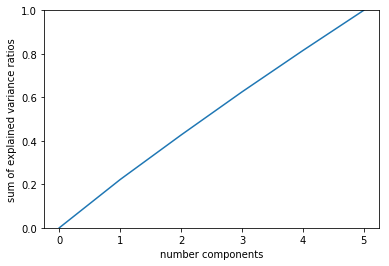

In [26]:
plt.plot(range(n_comp+1),s_evr)
plt.xlabel('number components')
plt.ylabel('sum of explained variance ratios')
plt.ylim([0,1])
plt.show()

Explained variance ratio: 
 [0.86595017 0.08055444 0.02845407 0.01463786 0.01040346]
Cumulative explained variance: 
 [0.         0.86595017 0.94650461 0.97495868 0.98959654 1.        ]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: covariance is not positive-semidefinite.


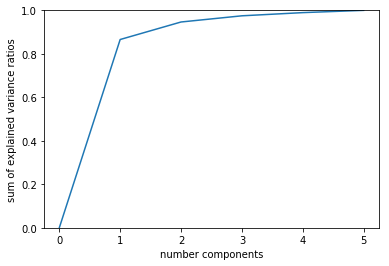

In [27]:
dat_corr = make_correlated_data(n_comp, phi=0.9, n=1000)
                                  
pca_mod = PCA(n_components = n_comp)
pca_mod.fit(dat_corr)

evr = pca_mod.explained_variance_ratio_
s_evr = np.cumsum(np.concatenate(([0], evr)))

print('Explained variance ratio: \n', evr)
print('Cumulative explained variance: \n', s_evr)

plt.plot(range(n_comp+1),s_evr)
plt.xlabel('number components')
plt.ylabel('sum of explained variance ratios')
plt.ylim([0,1])
plt.show()

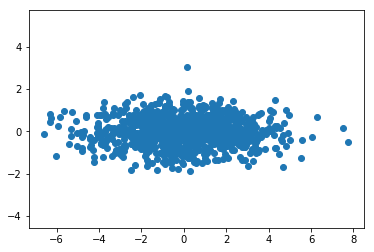

In [28]:
pca_dat = pca_mod.transform(dat_corr)
plt.scatter(pca_dat[:,0],pca_dat[:,1])
plt.axis("equal")
plt.show()

## Task 2: Non-linear Methods

1. Use the circles data. Plot the data, fit regular PCA to the data. Is this very effective? Why or why not?

2. Now try using KernelPCA instead. This is a little trickier than regular PCA; follow these steps:

2a: Fit Kernel PCA to the circles data using KernelPCA, try 5 components to start. Use the rbf kernel, with gamma = 1 (see the arguments in the documentation).

2b: The lambda\_ values roughly correspond to the amount of explained variance. You'll need to normalize by their sum to get an idea of how much variance each component explains. How much variance do the number of componenets explain? Try adding more than 5 componenets: do these extra components add any value? Explore the resulting data by plotting 2D projections. Which component of the resulting data would be a good projection to 1D?

2c: It is not easy to see exactly what each component means in the original space, but we can look at the data points projected into the kernel PCA space. Use the alpha\_ values to see this. Make a plot for both the inner and outer circle. Do you see any patterns?

If you have time, try this process on:

swiss roll data
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html

s curve data
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html#sklearn.datasets.make_s_curve

these don't have two pieces like the circle data, but have a simple nonlinear structure that can be captured with kernel PCA.

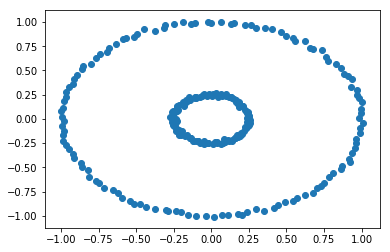

In [29]:
np.random.seed(42)

# make some circle data:
# dat_circles is the raw data, dat_circle label is a label indicating
# if the point is in the inner or outer circle (see the plot below)
dat_circles, dat_circle_label = make_circles(250, noise=0.01, factor=0.25)

# simple scatterplot of the data, so you get the idea ;)
plt.scatter(dat_circles[:, 0], dat_circles[:, 1])
plt.show()

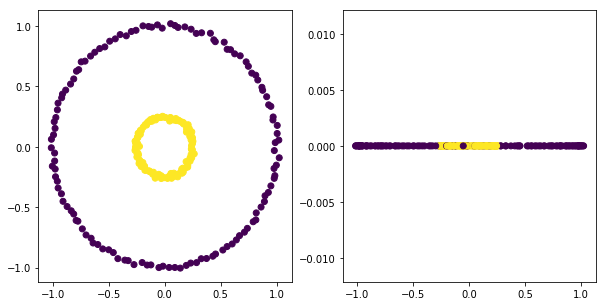

In [30]:
n_comp = 2
pca = PCA(n_components = n_comp)
pca_dat = pca.fit_transform(dat_circles)


f, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(pca_dat[:, 0], pca_dat[:, 1],c=dat_circle_label)
ax[1].scatter(pca_dat[:,0],np.zeros((pca_dat.shape[0],)),c=dat_circle_label)
plt.show()



Explained variance ratio: 
 [0.50155192 0.49844808]
Cumulative explained variance: 
 [0.         0.50155192 1.        ]


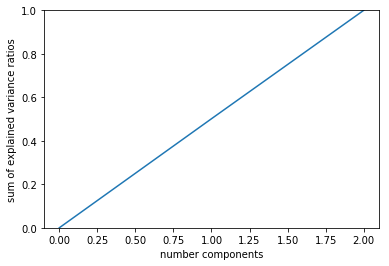

In [31]:
evr = pca.explained_variance_ratio_
s_evr = np.cumsum(np.concatenate(([0], evr)))

print('Explained variance ratio: \n', evr)
print('Cumulative explained variance: \n', s_evr)

plt.plot(range(n_comp+1),s_evr)
plt.xlabel('number components')
plt.ylabel('sum of explained variance ratios')
plt.ylim([0,1])
plt.show()

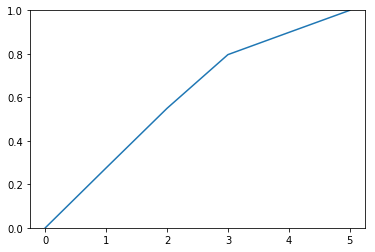

The first three dimensions seem to be especially important


In [32]:
n_comp = 5
kpca = KernelPCA(n_components = n_comp, kernel="rbf", gamma = 1)
kpca.fit(dat_circles)
kpca_dat = kpca.transform(dat_circles)

lambdas = kpca.lambdas_/sum(kpca.lambdas_)
s_lambdas = np.cumsum(np.concatenate(([0],lambdas)))
plt.plot(s_lambdas)
plt.ylim([0,1])
plt.show()

print('The first three dimensions seem to be especially important')




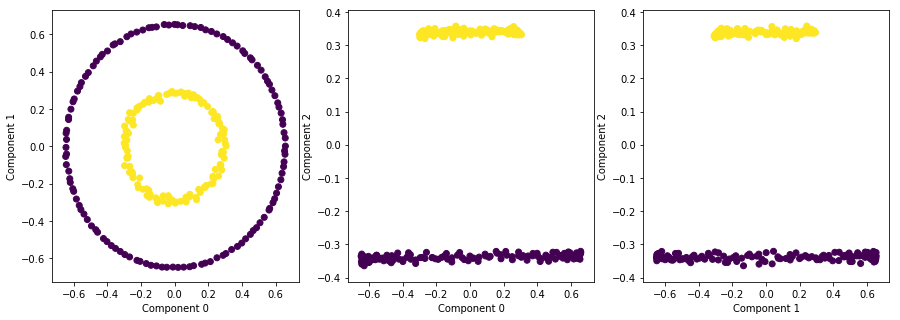

In [33]:
f, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(kpca_dat[:, 0], kpca_dat[:, 1],c=dat_circle_label)
ax[0].set_xlabel('Component 0')
ax[0].set_ylabel('Component 1')
ax[1].scatter(kpca_dat[:,0],kpca_dat[:,2], c=dat_circle_label)
ax[1].set_xlabel('Component 0')
ax[1].set_ylabel('Component 2')
ax[2].scatter(kpca_dat[:,1],kpca_dat[:,2], c=dat_circle_label)
ax[2].set_xlabel('Component 1')
ax[2].set_ylabel('Component 2')
plt.show()

Plotting only component 2, nicely linearly separable


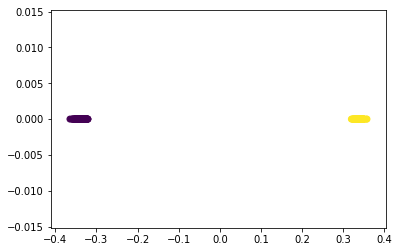

In [34]:
print('Plotting only component 2, nicely linearly separable')

plt.scatter(kpca_dat[:,2],np.zeros((pca_dat.shape[0],)),c=dat_circle_label)
plt.show()

Full projection space:  (250, 213)


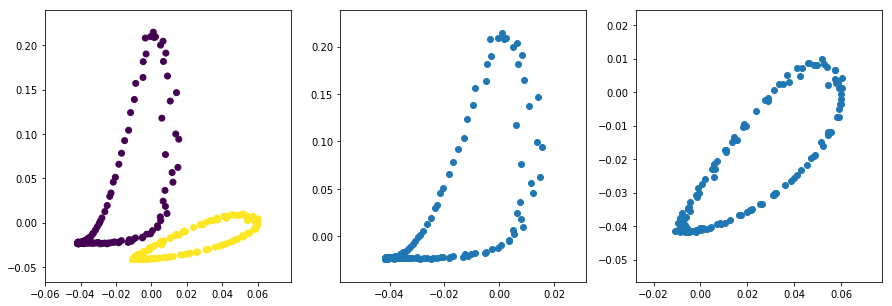

In [35]:
# we drop n_components as argument to get all possible components
kpca = KernelPCA(kernel="rbf", gamma = 1)
kpca.fit(dat_circles)
kpca_dat = kpca.transform(dat_circles)
print('Full projection space: ', kpca_dat.shape)


alpha = kpca.alphas_

# Multiplication of alpha with kpca_dat to get the data after mapping to the nonlinear space
ad = np.dot(alpha, kpca_dat.transpose())

outer = dat_circle_label == 0
inner = dat_circle_label == 1

# Just plotting the first two components of the 220 components
f, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(ad[:, 0], ad[:, 1],c=dat_circle_label)
ax[1].scatter(ad[outer,0], ad[outer,1])
ax[2].scatter(ad[inner,0], ad[inner,1])
plt.show()